In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.inspection import permutation_importance

In [2]:


df = pd.read_excel('Data_2.xlsx')

df = df[df["code"] == "PCG"]

df["date"] = pd.to_datetime(df["date"])

df = df.sort_values(by="date")

df = df.drop(columns=['code'])


In [3]:
df

,date,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,...,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
13972,2017-01-03,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.6,8.6,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000
12064,2017-01-04,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.6,8.6,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000
13964,2017-01-05,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.6,8.6,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000
12254,2017-01-06,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.6,8.6,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000
13968,2017-01-09,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.6,8.6,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,2021-12-27,9.8,10.7,8.9,9.8,9.8,9.6,9.6,9.654,9.8,...,9.6,9.6,9.654,30200,2.915400e+08,0,0,-0.2,-0.2,-2.0408
1516,2021-12-28,9.6,10.5,8.7,9.8,10.0,9.6,9.8,9.795,9.8,...,9.6,9.8,9.795,31258,3.061533e+08,0,0,0.2,0.2,2.0833
782,2021-12-29,9.8,10.7,8.9,9.8,10.7,9.8,10.7,10.571,9.8,...,9.8,10.7,10.571,156109,1.650236e+09,0,0,0.9,0.9,9.1837
786,2021-12-30,10.7,11.7,9.7,11.0,11.4,10.7,10.7,10.982,11.0,...,10.7,10.7,10.982,161100,1.769200e+09,0,0,0.0,0.0,0.0000


In [4]:
df['High-Low'] = (df['high'] - df['low']) 
df['Open-Close'] = (df['open'] - df['close'])
df

,date,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,...,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange,High-Low,Open-Close
13972,2017-01-03,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000,0.0,0.0
12064,2017-01-04,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000,0.0,0.0
13964,2017-01-05,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000,0.0,0.0
12254,2017-01-06,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000,0.0,0.0
13968,2017-01-09,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,2021-12-27,9.8,10.7,8.9,9.8,9.8,9.6,9.6,9.654,9.8,...,9.654,30200,2.915400e+08,0,0,-0.2,-0.2,-2.0408,0.2,0.2
1516,2021-12-28,9.6,10.5,8.7,9.8,10.0,9.6,9.8,9.795,9.8,...,9.795,31258,3.061533e+08,0,0,0.2,0.2,2.0833,0.4,0.0
782,2021-12-29,9.8,10.7,8.9,9.8,10.7,9.8,10.7,10.571,9.8,...,10.571,156109,1.650236e+09,0,0,0.9,0.9,9.1837,0.9,-0.9
786,2021-12-30,10.7,11.7,9.7,11.0,11.4,10.7,10.7,10.982,11.0,...,10.982,161100,1.769200e+09,0,0,0.0,0.0,0.0000,0.7,0.3


In [5]:
df 

,date,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,...,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange,High-Low,Open-Close
13972,2017-01-03,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000,0.0,0.0
12064,2017-01-04,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000,0.0,0.0
13964,2017-01-05,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000,0.0,0.0
12254,2017-01-06,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000,0.0,0.0
13968,2017-01-09,8.6,9.4,7.8,8.6,8.6,8.6,8.6,8.600,8.6,...,8.600,0,0.000000e+00,0,0,0.0,0.0,0.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,2021-12-27,9.8,10.7,8.9,9.8,9.8,9.6,9.6,9.654,9.8,...,9.654,30200,2.915400e+08,0,0,-0.2,-0.2,-2.0408,0.2,0.2
1516,2021-12-28,9.6,10.5,8.7,9.8,10.0,9.6,9.8,9.795,9.8,...,9.795,31258,3.061533e+08,0,0,0.2,0.2,2.0833,0.4,0.0
782,2021-12-29,9.8,10.7,8.9,9.8,10.7,9.8,10.7,10.571,9.8,...,10.571,156109,1.650236e+09,0,0,0.9,0.9,9.1837,0.9,-0.9
786,2021-12-30,10.7,11.7,9.7,11.0,11.4,10.7,10.7,10.982,11.0,...,10.982,161100,1.769200e+09,0,0,0.0,0.0,0.0000,0.7,0.3


In [18]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import pandas as pd


data = df
# 1. Tạo bộ dữ liệu train và test
train = df[df['date'] <= '2021-11-30']
test = df[(df['date'] >= '2021-12-01') & (df['date'] <= '2021-12-31')]

X_train = train[['basicPrice', 'ceilingPrice', 'floorPrice', 'open', 'high', 'low', 'average', 'adOpen', 'adHigh', 'adLow', 'adAverage', 'nmVolume', 'nmValue', 'ptVolume', 'ptValue', 'change', 'adChange', 'pctChange','High-Low','Open-Close']]
y_train = train['close']
X_test = test[['basicPrice', 'ceilingPrice', 'floorPrice', 'open', 'high', 'low', 'average', 'adOpen', 'adHigh', 'adLow', 'adAverage', 'nmVolume', 'nmValue', 'ptVolume', 'ptValue', 'change', 'adChange', 'pctChange','High-Low','Open-Close']]
y_test = test['close']

# 2. Xử lý dữ liệu
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# 3. Xây dựng mô hình SVM
model = SVR(kernel='linear')

# 4. Huấn luyện mô hình
model.fit(X_train, y_train)

# 5. Dự đoán giá đóng cửa trên tập dữ liệu test
y_pred = model.predict(X_test)

# 6. Đánh giá mô hình
# print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
# print("MAE:", mean_absolute_error(y_test, y_pred))
# print("R-squared:", r2_score(y_test, y_pred))

# Sử dụng kỹ thuật permutation importance để tính toán feature importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
# In ra kết quả
# In ra 10 feature quan trọng nhất
print("Feature importance:")
for i in result.importances_mean.argsort()[::-1]:
    print(f"{X_test.columns[i]} - {result.importances_mean[i]:.3f}")


Feature importance:
Open-Close - 0.924
open - 0.355
adOpen - 0.355
low - 0.004
adLow - 0.004
nmVolume - 0.002
adHigh - 0.001
high - 0.001
ceilingPrice - 0.000
basicPrice - 0.000
floorPrice - 0.000
ptValue - 0.000
ptVolume - 0.000
pctChange - -0.000
average - -0.000
adAverage - -0.000
High-Low - -0.001
adChange - -0.001
change - -0.001
nmValue - -0.001


In [31]:
from sklearn.feature_selection import RFE

# Định nghĩa mô hình SVM
model = SVR(kernel='linear')

# Sử dụng RFE để chọn các feature quan trọng
rfe = RFE(model, n_features_to_select=5) # chọn số feature quan trọng cần giữ lại

# Fit RFE trên tập dữ liệu train
rfe.fit(X_train, y_train)

# In ra các feature quan trọng được chọn bởi RFE
print("Selected Features:", X_train.columns[rfe.support_])

# Đánh giá mô hình trên tập dữ liệu test chỉ với các feature được chọn bởi RFE
y_pred = rfe.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Selected Features: Index(['open', 'low', 'adOpen', 'adHigh', 'Open-Close'], dtype='object')
RMSE: 0.015090016081090502
MAE: 0.010920704267131128
R-squared: 0.9985062271622237


In [9]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


data =df
# 1. Tạo bộ dữ liệu train và test
train = df[df['date'] <= '2021-11-30']
test = df[(df['date'] >= '2021-12-01') & (df['date'] <= '2021-12-31')]

X_train = train[['open', 'adOpen' ,'Open-Close']]
y_train = train['close']
X_test = test[['open', 'adOpen', 'Open-Close']]
y_test = test['close']

# 2. Xử lý dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Xây dựng mô hình SVM
model = SVR(kernel='linear')

# 4. Huấn luyện mô hình
model.fit(X_train, y_train)

# 5. Dự đoán giá đóng cửa trên tập dữ liệu test
y_pred = model.predict(X_test)

# 6. Đánh giá mô hình
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


RMSE: 0.03595519193597175
MAE: 0.03571566602971056
R-squared: 0.9915193649235651


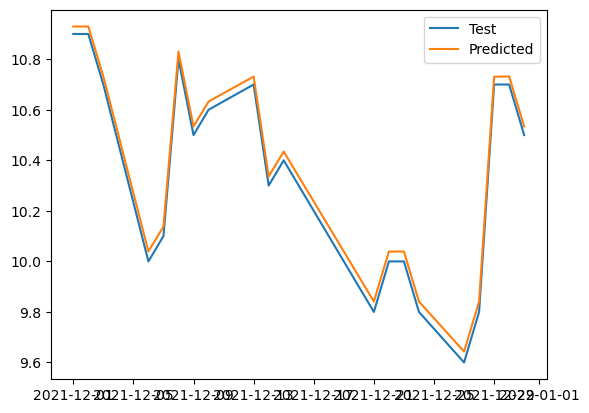

In [10]:
import matplotlib.pyplot as plt

# 4. Vẽ biểu đồ
plt.plot(test['date'], test['close'], label='Test')
plt.plot(test['date'], y_pred, label='Predicted')
plt.legend()
plt.show()